In [3]:
#import libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.layers import Conv2D
from keras.layers import Dense, Conv2D ,Flatten,Dropout,MaxPool2D, BatchNormalization
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory  
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import VGG19
import keras
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np 
import tensorflow as tf
import pandas as pd
import seaborn
from sklearn.metrics import confusion_matrix , classification_report

In [4]:
#import our data
train_datagen = ImageDataGenerator(
    rescale=1. / 255,rotation_range=10, fill_mode='nearest',
     featurewise_center=True,
    featurewise_std_normalization=True,
    vertical_flip= True,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range = (0.4,0.6),
    horizontal_flip=True,validation_split=0.3)



In [5]:
train_generator = train_datagen.flow_from_directory(
    'C:/Users/tyagi/OneDrive/Desktop/Capstone Summer/Data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',subset='training'
  )

Found 3942 images belonging to 4 classes.


In [6]:
test_generator = train_datagen.flow_from_directory(
     'C:/Users/tyagi/OneDrive/Desktop/Capstone Summer/Data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',subset='validation'
    
  )

Found 1689 images belonging to 4 classes.


Found 5631 files belonging to 4 classes.


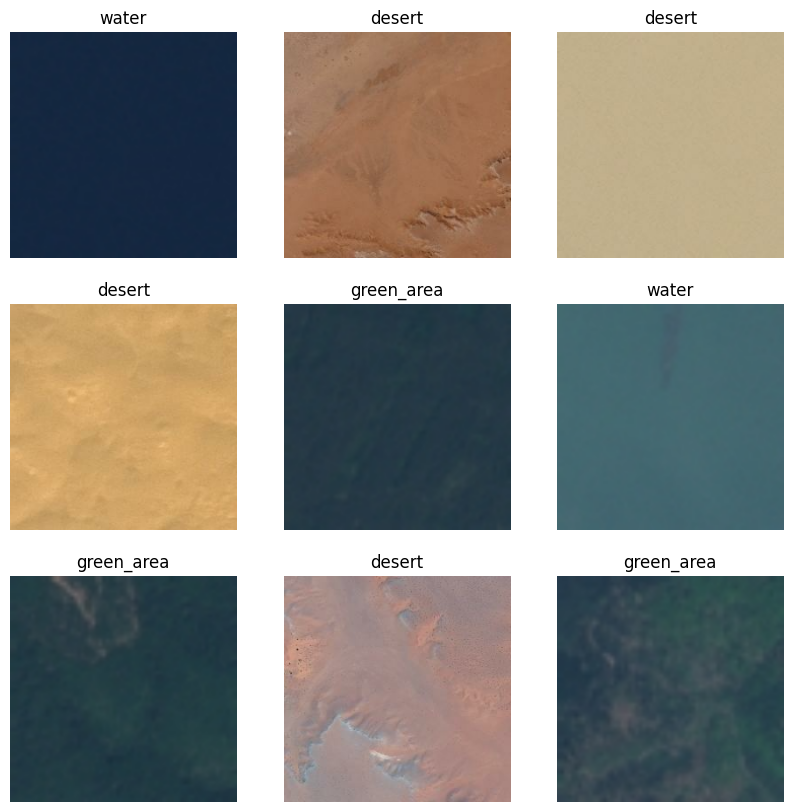

In [7]:
train_dataset = image_dataset_from_directory('C:/Users/tyagi/OneDrive/Desktop/Capstone Summer/Data',
                                             shuffle=True,
                                             batch_size=32,image_size=(224,224))
class_name =  train_dataset.class_names
plt.figure(figsize = (10,10))
for image , label in train_dataset.take(1):
    for i in range(9) :
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(class_name[label[i]])
        plt.axis("off")

In [8]:
#call vgg model
vgg_model =  VGG19(include_top=True , weights='imagenet')
for models in vgg_model.layers:
  models.trainable= False

In [9]:
#converting from functionally model to sequential model
#removing the last 2 alyer to get rid of output layer in VGG16
vgg_model = keras.Model(inputs=vgg_model.input, outputs=vgg_model.layers[-2].output)
model = keras.Sequential()
for layer in vgg_model.layers:
  model.add(layer)

model.add(Dense(4, activation='softmax'))

In [10]:
model.compile(optimizer="adam", loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [12]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [13]:
FIT =model.fit(train_generator,
    validation_data = test_generator, 
    callbacks = [early],
    epochs = 50)

c:\Users\tyagi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\legacy\preprocessing\image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
c:\Users\tyagi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\legacy\preprocessing\image.py:1273: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/50


c:\Users\tyagi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


124/124 ━━━━━━━━━━━━━━━━━━━━ 664s 5s/step - accuracy: 0.2882 - loss: 1.4660 - val_accuracy: 0.2872 - val_loss: 1.3304
Epoch 2/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 658s 5s/step - accuracy: 0.3988 - loss: 1.2882 - val_accuracy: 0.4920 - val_loss: 1.1898
Epoch 3/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 647s 5s/step - accuracy: 0.4749 - loss: 1.2043 - val_accuracy: 0.4855 - val_loss: 1.1339
Epoch 4/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 593s 5s/step - accuracy: 0.5633 - loss: 1.0869 - val_accuracy: 0.5335 - val_loss: 1.0747
Epoch 5/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 555s 4s/step - accuracy: 0.5967 - loss: 1.0304 - val_accuracy: 0.6288 - val_loss: 0.9482
Epoch 6/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 555s 4s/step - accuracy: 0.6327 - loss: 0.9615 - val_accuracy: 0.4950 - val_loss: 1.0625
Epoch 7/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 556s 4s/step - accuracy: 0.6155 - loss: 0.9532 - val_accuracy: 0.6015 - val_loss: 0.8862
Epoch 8/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 551s 4s/step - accuracy: 0.6543 - loss: 0.8922 - val_accuracy: 0.563

In [14]:
model.evaluate(test_generator)

53/53 ━━━━━━━━━━━━━━━━━━━━ 191s 4s/step - accuracy: 0.8537 - loss: 0.4025


[0.3887501060962677, 0.863824725151062]

In [15]:
#classes names 
class_name = {0:"cloud",1:"desert" , 2 : 'green_area', 3: 'water'}

In [16]:
#predict test data
y = model.predict(test_generator)
y =  np.argmax(y,axis= 1 )
y 

53/53 ━━━━━━━━━━━━━━━━━━━━ 189s 4s/step


array([2, 3, 1, ..., 1, 3, 1], dtype=int64)

In [17]:
#y_true and y_pred
y_true = np.array([])
y_pred = np.array([])

i = 0
for data, labels in test_generator:
  i += 1
  y = np.argmax(model.predict(data), axis=1)
  y_true = np.append(y_true, labels)
  y_pred = np.append(y_pred, y)
  
  if i == test_generator.samples // 32 + 1:
    break

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 

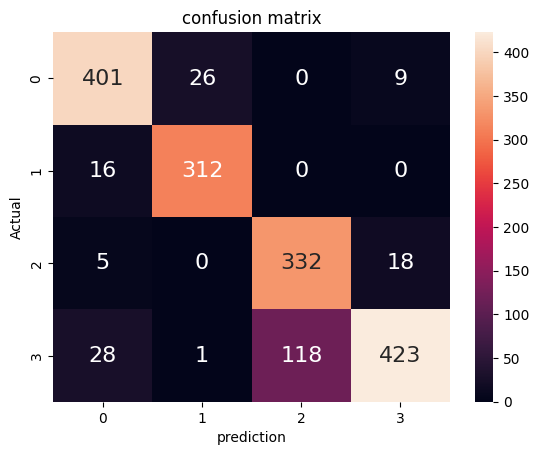

In [18]:
cm  = confusion_matrix(y_pred,y_true)
df_cm = pd.DataFrame(cm, index = [i for i in range(4)],
                  columns = [i for i in range(4)])
seaborn .heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d')
plt.title('confusion matrix')
plt.xlabel('prediction')
plt.ylabel('Actual');

In [19]:
print(classification_report(y_pred, y_true))

              precision    recall  f1-score   support

         0.0       0.89      0.92      0.91       436
         1.0       0.92      0.95      0.94       328
         2.0       0.74      0.94      0.82       355
         3.0       0.94      0.74      0.83       570

    accuracy                           0.87      1689
   macro avg       0.87      0.89      0.87      1689
weighted avg       0.88      0.87      0.87      1689



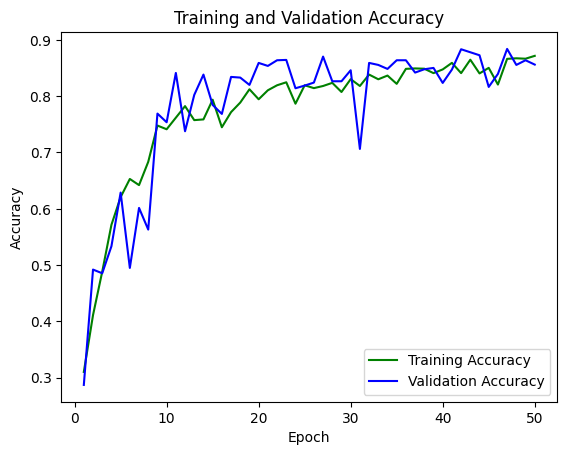

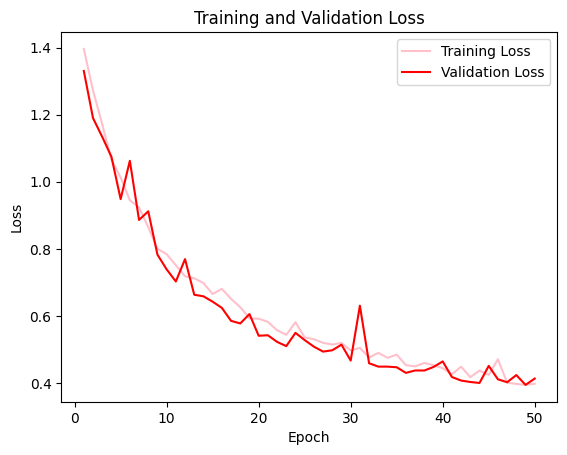

In [20]:
#plot the result
import matplotlib.pyplot as plt
acc = FIT.history['accuracy']
val_acc = FIT.history['val_accuracy']
loss = FIT.history['loss']
val_loss = FIT.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [21]:
model.save('vggg19_model.h5')